In [1]:
import json
import urllib2 
import os
import sys
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import os
from getCitiBikeCSV import getCitiBikeCSV
from scipy.stats import norm as nor
from scipy import stats
%matplotlib inline

In [2]:
#Get the citibike data
datestring1 = '201601'
getCitiBikeCSV(datestring1)
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.head(3)

('Downloading', '201601')
file in place, you can continue


,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2


In [3]:
type(df['start station id'].unique())

numpy.ndarray

In [4]:
#Create a dataframe with station id, latitude, longitude and also zip of all the unique station id's in the dataframe
df_zip = pd.DataFrame()
for id in df['start station id'].unique():
    df_zip.loc[id,'lat'] = float(df[df['start station id'] == id]['start station latitude'].unique())
    df_zip.loc[id,'lon'] = float(df[df['start station id'] == id]['start station longitude'].unique())

In [5]:
df_zip.reset_index(inplace=True)

In [6]:
df_zip

,index,lat,lon
0,268,40.719105,-73.999733
1,476,40.743943,-73.979661
2,489,40.750664,-74.001768
3,2006,40.765909,-73.976342
4,3104,40.720577,-73.961502
5,3167,40.779668,-73.980930
6,527,40.744023,-73.976056
7,432,40.726218,-73.983799
8,3226,40.782750,-73.971370
9,331,40.711731,-73.991930


In [7]:
# Using reverse geocoding, getting the zipcode from the json received by passing the latitude and longitude - I found this API
#from google search, but I am unable to find the website again to cite it!!
for i in range(len(df_zip)):
    url = "http://nominatim.openstreetmap.org/reverse?format=json&lat={0}\
&lon={1}&zoom=18&addressdetails=1".format(df_zip['lat'][i],df_zip['lon'][i])
    response = urllib2.urlopen(url)
    data = response.read().decode("utf-8")
    info = json.loads(data)
    df_zip.loc[i,'zip'] = int(filter(str.isdigit, str(info['address']['postcode'])))

In [8]:
df_zip.rename(columns={"index": "start station id"}, inplace=True)
df_zip

,start station id,lat,lon,zip
0,268,40.719105,-73.999733,10013.0
1,476,40.743943,-73.979661,10016.0
2,489,40.750664,-74.001768,10019.0
3,2006,40.765909,-73.976342,10153.0
4,3104,40.720577,-73.961502,11211.0
5,3167,40.779668,-73.980930,10024.0
6,527,40.744023,-73.976056,10016.0
7,432,40.726218,-73.983799,10009.0
8,3226,40.782750,-73.971370,10024.0
9,331,40.711731,-73.991930,10002.0


In [9]:
#merge the dataframes
df = pd.merge(df,df_zip,on='start station id')

In [11]:
df['age'] = 2016 - df['birth year']
df.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,lat,lon,zip,age
0,0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,40.719105,-73.999733,10013.0,58.0
1,3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,40.719105,-73.999733,10013.0,55.0
2,7,694,1/1/2016 00:02:18,1/1/2016 00:13:53,268,Howard St & Centre St,40.719105,-73.999733,497,E 17 St & Broadway,40.737050,-73.990093,15747,Subscriber,1996.0,1,40.719105,-73.999733,10013.0,20.0
3,648,2058,1/1/2016 01:56:59,1/1/2016 02:31:17,268,Howard St & Centre St,40.719105,-73.999733,372,Franklin Ave & Myrtle Ave,40.694528,-73.958089,16614,Subscriber,1974.0,2,40.719105,-73.999733,10013.0,42.0
4,844,541,1/1/2016 02:33:40,1/1/2016 02:42:41,268,Howard St & Centre St,40.719105,-73.999733,342,Columbia St & Rivington St,40.717400,-73.980166,22040,Subscriber,1954.0,1,40.719105,-73.999733,10013.0,62.0


In [12]:
df_new = df.iloc[:,18:]
df_new.head()

,zip,age
0,10013.0,58.0
1,10013.0,55.0
2,10013.0,20.0
3,10013.0,42.0
4,10013.0,62.0


In [13]:
#Get the zipcodes by boroughs used the website: "http://www.citidex.com/map/zipco.html"

brooklyn_zips = [11212, 11213, 11216, 11233, 11238, 11209, 11214, 11228, 11204, 11218, 11219, 11230, 11234, 11236, 11239 ,
                 11223, 11224, 11229, 11235, 11201, 11205, 11215, 11217, 11231, 11203, 11210, 11225, 11226, 11207, 11208,
                11211, 11222, 11220, 11232, 11206, 11221, 11237]

bronx_zips = [10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456, 10454, 10455, 10459, 10474, 10463, 10471,
             10466, 10469, 10470, 10475, 10461, 10462,10464, 10465, 10472, 10473]

queens_zips = [11361, 11362, 11363, 11364, 11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 11367, 11412, 
               11423, 11432, 11433, 11434, 11435, 11436, 11101, 11102, 11103, 11104, 11105, 11106, 11374, 11375, 11379,
               11385, 11691, 11692, 11693, 11694, 11695, 11697, 11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 
               11429, 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11368, 11369, 11370, 11372, 11373, 11377, 
               11378]

staten_zips = [10302, 10303, 10310, 10306, 10307, 10308, 10309, 10312, 10301, 10304, 10305, 10314]

upper_man_zips = [10026, 10027, 10030, 10037, 10039, 10029, 10035, 10031, 10032, 10033, 10034, 10040, 
                 10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025]

lower_man_zips = [10001, 10011, 10018, 10019, 10020, 10036, 10010, 10016, 10017, 10022, 10012, 10013, 10014,
                 10004, 10005, 10006, 10007, 10038, 10280, 10002, 10003, 10009]


In [14]:
brooklyn_ages = []
bronx_ages =[]
upper_man_ages =[]
lower_man_ages =[]
queens_ages = []
staten_ages = []
for zip in brooklyn_zips:
    brooklyn_ages.extend(list(df_new[df_new['zip'] == zip]['age']))
for zip in bronx_zips:
    bronx_ages.extend(list(df_new[df_new['zip'] == zip]['age']))
for zip in queens_zips:
    queens_ages.extend(list(df_new[df_new['zip'] == zip]['age']))
for zip in staten_zips:
    staten_ages.extend(list(df_new[df_new['zip'] == zip]['age']))
for zip in upper_man_zips:
    upper_man_ages.extend(list(df_new[df_new['zip'] == zip]['age']))
for zip in lower_man_zips:
    lower_man_ages.extend(list(df_new[df_new['zip'] == zip]['age']))

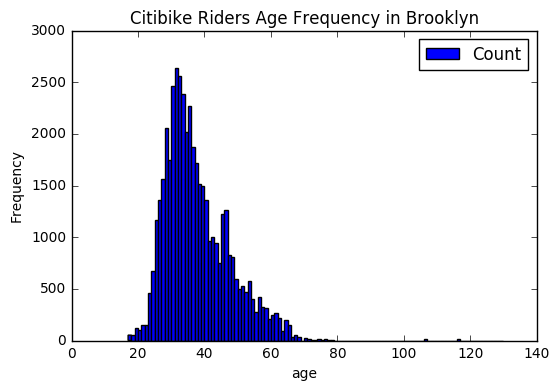

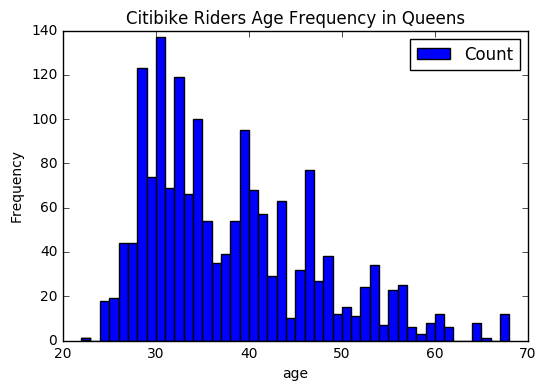

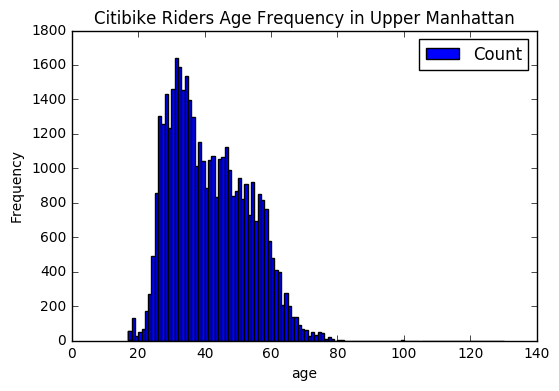

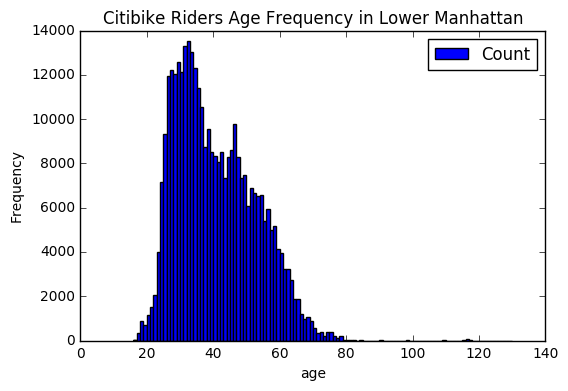

In [15]:
if len(brooklyn_ages) >= 1:
    bins = np.arange(min(brooklyn_ages), max(brooklyn_ages), 1)
    plt.hist(brooklyn_ages, bins, label='Count')
    plt.title('Citibike Riders Age Frequency in Brooklyn')
    plt.xlabel('age')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

if len(bronx_ages) >= 1:
    bins = np.arange(min(bronx_ages), max(bronx_ages), 1)
    plt.hist(bronx_ages, bins, label='Count')
    plt.title('Citibike Riders Age Frequency in Bronx')
    plt.xlabel('age')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

if len(queens_ages) >= 1:
    bins = np.arange(min(queens_ages), max(queens_ages), 1)
    plt.hist(queens_ages, bins, label='Count')
    plt.title('Citibike Riders Age Frequency in Queens')
    plt.xlabel('age')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

if len(upper_man_ages) >= 1:
    bins = np.arange(min(upper_man_ages), max(upper_man_ages), 1)
    plt.hist(upper_man_ages, bins, label='Count')
    plt.title('Citibike Riders Age Frequency in Upper Manhattan')
    plt.xlabel('age')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

if len(lower_man_ages) >= 1:    
    bins = np.arange(min(lower_man_ages), max(lower_man_ages), 1)
    plt.hist(lower_man_ages, bins, label='Count')
    plt.title('Citibike Riders Age Frequency in Lower Manhattan')
    plt.xlabel('age')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

if len(staten_ages) >= 1:    
    bins = np.arange(min(staten_ages), max(staten_ages), 1)
    plt.hist(staten_ages, bins, label='Count')
    plt.title('Citibike Riders Age Frequency in Staten Island')
    plt.xlabel('age')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Figure 1: Histograms of age dustribution of citibike riders by Boroughs. Unfortunately, there are no entries of Bronx and Staten islands in given dataset

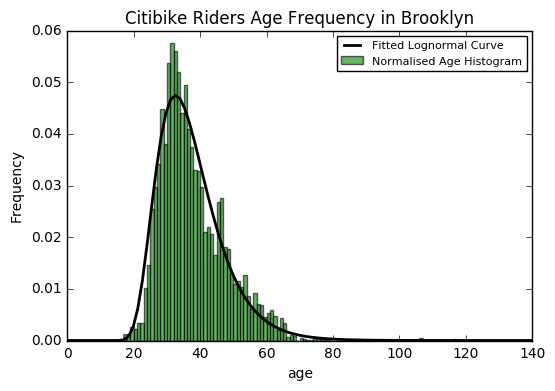

In [138]:
params = stats.lognorm.fit(brooklyn_ages)
bins = np.arange(min(brooklyn_ages), max(brooklyn_ages), 1)
#plt.hist(df_age.index.values, bins, label='Count')
plt.hist(brooklyn_ages, bins, normed = True, alpha=0.6, color='g', label = 'Normalised Age Histogram')
plt.title('Citibike Riders Age Frequency in Brooklyn')
plt.xlabel('age')
plt.ylabel('Frequency')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.lognorm.pdf(x, params[0], params[1], params[2])
plt.plot(x, p, 'k', linewidth=2, label = 'Fitted Lognormal Curve')
plt.legend(loc='best', fontsize=8) 

# Figure 2: Histogram of Age Distribution of riders in Brooklyn and a fitted lognormal curve 

# KS Test with Lognormal Distribution

### Significance Level = 0.05

### Null Hypothesis: Two distributions which are compared for goodness of fit test are identical.

#### In current scenario, Null Hypothesis($H_0$): The citibike rider's age distribution and the lognormal distribution) are identical.

In [135]:
stats.kstest(brooklyn_ages, stats.lognorm.cdf, args=(params[0], params[1], params[2]))

KstestResult(statistic=0.049795043314567411, pvalue=4.3408784811108992e-99)

#### The p-value is very low than 0.05 which is less than significance level of 0.05, so we are rejecting the Null Hypothesis at  95% statistical significance level.  
#### The age distribution of citibike riders and the lognormal distribution are not identical.

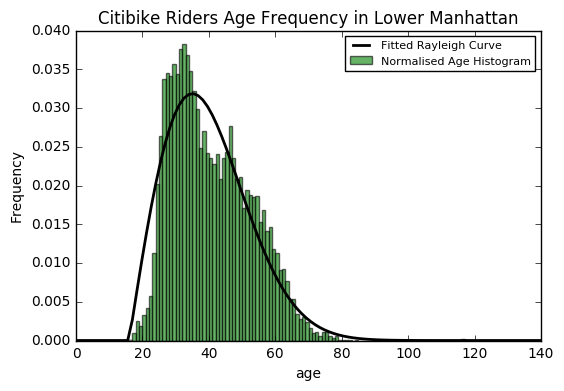

In [141]:
params = stats.rayleigh.fit(lower_man_ages)
bins = np.arange(min(lower_man_ages), max(lower_man_ages), 1)
#plt.hist(df_age.index.values, bins, label='Count')
plt.hist(lower_man_ages, bins, normed = True, alpha=0.6, color='g', label = 'Normalised Age Histogram')
plt.title('Citibike Riders Age Frequency in Lower Manhattan')
plt.xlabel('age')
plt.ylabel('Frequency')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.rayleigh.pdf(x, params[0], params[1])
plt.plot(x, p, 'k', linewidth=2, label = 'Fitted Rayleigh Curve')
plt.legend(loc='best', fontsize=8) 

# Figure 3: Histogram of Age Distribution of riders in Lower Manhattan and a fitted Rayleigh curve 

# KS Test with Rayleigh Distribution

### Significance Level = 0.05

### Null Hypothesis: Two distributions which are compared for goodness of fit test are identical.

#### In current scenario, Null Hypothesis($H_0$): The citibike rider's age distribution and the Rayleigh distribution are identical.

In [142]:
stats.kstest(lower_man_ages, stats.rayleigh.cdf, args=(params[0], params[1]))

KstestResult(statistic=0.055452263860448381, pvalue=0.0)

#### The p-value is very low than 0.05 which is less than significance level of 0.05, so we are rejecting the Null Hypothesis at  95% statistical significance level.  
#### The age distribution of citibike riders and the Rayleigh distribution are not identical.

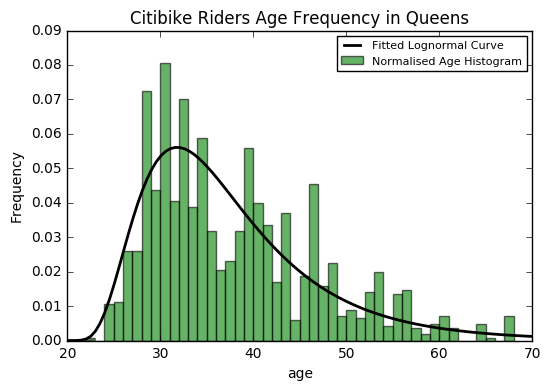

In [146]:
params = stats.lognorm.fit(queens_ages)
bins = np.arange(min(queens_ages), max(queens_ages), 1)
#plt.hist(df_age.index.values, bins, label='Count')
plt.hist(queens_ages, bins, normed = True, alpha=0.6, color='g', label = 'Normalised Age Histogram')
plt.title('Citibike Riders Age Frequency in Queens')
plt.xlabel('age')
plt.ylabel('Frequency')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.lognorm.pdf(x, params[0], params[1], params[2])
plt.plot(x, p, 'k', linewidth=2, label = 'Fitted Lognormal Curve')
plt.legend(loc='best', fontsize=8) 

# Figure 4: Histogram of Age Distribution of riders in Queens and a fitted Lognormal curve 

# KS Test with Rayleigh Distribution

### Significance Level = 0.05

### Null Hypothesis: Two distributions which are compared for goodness of fit test are identical.

#### In current scenario, Null Hypothesis($H_0$): The citibike rider's age distribution and the Lognormal distribution are identical.

In [147]:
stats.kstest(lower_man_ages, stats.lognorm.cdf, args=(params[0], params[1], params[2]))

KstestResult(statistic=0.1755188956315531, pvalue=0.0)

#### The p-value is very low than 0.05 which is less than significance level of 0.05, so we are rejecting the Null Hypothesis at  95% statistical significance level.  
#### The age distribution of citibike riders and the Lognormal distribution are not identical.